5 main components of a single agent system.
- Actions and Tool Use: Actions represents a function/tool an agent can use.
- Reasoning and Evaluation: Reasoning and evaluation group the agent and empower it to make better decisions.
- Profile and Persona: A persona represents the agent's main role or function, typicalyy defined in a system prompt. The profile describes the entire agent system.
- Memory and Knowledge: Memory and knowleddge provide added context to the agetn for a speific request or task.
- Planning and Feedback: Planning and feedback allow the agent to learn and improve on task completion.

In [1]:
! uv pip install openai python-dotenv

Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Audited 2 packages in 4ms


In [2]:
import os
from openai import OpenAI
from dotenv import load_dotenv

In [11]:
client = OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama"
    )

In [12]:
def ask_chatgpt(user_message): 
    response = client.chat.completions.create( 
    model="qwen2.5-coder:14b",
    messages=[{"role": "system",
        "content": "You are a helpful assistant."},
        {"role": "user", "content": user_message}],
        temperature=0.7,
    )
    return response.choices[0].message.content
user = "What is the capital of France?"
response = ask_chatgpt(user)
print(response)

The capital of France is Paris.


### Prompt Engineering Strategies
- Write Clear Instructions: Be specific in what you ask. Tactics include detailing queries, adopting personas, using delimiters, specifying steps, providing examples, and specifying output length.
- Provide Reference Text: Helps reduce fabrications. tactics involv instructing the model to use or cite reference texts.
- Use External Tools: Enhance model capabilites. Tactics include embeding-based search, code execution, and access to specific functions.
- Split complex Tasks into Simpler Subtasks: Reduces error rates. Tactics include intent classification, summarizing dialogues, and piecewise summarization of documents.
- Give Models Time to "Think": Allows more reliable reasoning. Tactics involve working out solutions before conclusions, using inner monologue, and reviewing previous answers.
- Test Changes Systematically: Ensures improvements are genuine. Tactics involved evaluating model outputs with reference to standard answers.


#### Strategy to Writing clear Instructions

##### Detail Queries
Without detailed queries: Who's the prime minister?

With detailed queries: Who is the prime minister of Canada, and how frequently are elections held?

Provide as much detail as you can in a query; generally, the more detail the better.

##### Adopting Personas
System: You are a prompt expert and will suggest ways to improve a user request.

User: What is the capital of Canada?

Personas can include details about demographics, knowledge, and personality.

##### Using Delimiters
User: Summarize the text delimited by triple quotes with a limerick:
"text to be summarized"

Delimiters can help separate blocks of content from specification details.

##### Specifying Steps
System: Use the following step-by-step instructions to respond to user inputs:

Step 1 - Summarize the text is triple quotes to one sentence with a prefix that says "Summary: ".

Step 2 - Translate the summary from Step 1 into French, with a prefix that says "Translation: ".

User: "text to summaarize and translate"

Using steps can help the LLM better process the task, but we sure to limite the number.

##### Providing Examples
System: Answer in a consistent style.

User: Teach me about the patience.

(Example) Assistant: The river that carves the deepest valley flows from a modest spring; the most intricate patestry begins with a solidary thread.

User: Teach me about the ocean.

Example are a form of few-shot learning and can be an excellent way to indicate the desired response format and other details.

##### Specify Output Length
User: Summarize the text delimited by triple quotes in about 50 words.
"text to summarize here"

Limiting the length of output can be specify to words, bullet points, and other metrics.

In [26]:
from typing import List, Dict, Optional, Union, Any
from openai import OpenAI
def prompt_llm(messages: List[Dict[str, str]],
               model: str ="gpt-4-1106-preview", 
               base_url: Optional[str] = None, 
               api_key: str = "") -> str | None:
    if base_url:
        #Azure or local LLM deployment
        client = OpenAI(base_url=base_url, api_key=api_key)
    else:
        #OpenAI deployment, api key set in environment variable
        client = OpenAI()
        
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0.7,                
        )       
    
    return response.choices[0].message.content

In [7]:
prompt = [
    {
        "role": "system",
        "content": "You are a 20 year old female who attends college in computer science. Answer all your replies as a junior programmer."  
    },
    {
        "role": "user",
        "content": "What is the best subject to study."
    }
]
[
    {
        "role": "system",
        "content": "You are a 38 year old male registered nurse. Answer all replies as a medical professional."
    },
    {
        "role": "user",
        "content": "What is the best subject to study."
    }
]
prompt_llm(
    prompt, 
    model="qwen2.5-coder:14b", 
    base_url="http://localhost:11434/v1",
    api_key="not used")

'As an AI, I don\'t have personal preferences or opinions, but I can share some insights on popular subjects that might be considered "best" depending on your goals and interests:\n\n1. **Computer Science**: If you\'re already in college for computer science, this is a great choice! It covers a broad range of topics like algorithms, data structures, software engineering, programming languages, and more.\n\n2. **Artificial Intelligence and Machine Learning**: These fields are rapidly growing and offer exciting opportunities for innovation. They involve complex problem-solving skills and can lead to careers in tech companies, research institutions, or startups.\n\n3. **Cybersecurity**: With the increasing amount of digital data and online threats, cybersecurity is becoming increasingly important. It focuses on protecting systems, networks, programs, devices, and information from cyber attacks.\n\n4. **Data Science**: This field combines statistics, computer science, and business to extra

In [ ]:
import os
import json

def list_text_files_in_directory(directory: str) -> List[str]:
    filenames: List[str] = os.listdir(directory)
    return list(
        filter(
            lambda file: not file.startswith("_") and file.endswith(".jsonl"), 
            filenames
        )
    )

       
def load_and_parse_json_file(file_path: str) -> List[Dict]:
    data: List[Dict[str, Any]] = []
    with open(file_path, 'r', encoding='utf-8') as file:
        buffer: List[str] = []
        for line in file:
            line = line.strip()
            buffer.append(line)

            if line == "]":
                try:
                    json_data = json.loads("".join(buffer))
                    data.append(json_data)
                except json.JSONDecodeError as e:
                    print(f"Error decoding JSON: {json_data}")
                    print(e)
                buffer = []    
    return data


# Multi Agents
## Autogen

In [ ]:
! uv pip install autogen

In [ ]:
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json

# Define the configuration for the Ollama model
config_list = config_list_from_json(env_or_file="autogen/LLM_CONFIG_LIST")

# Create an AssistantAgent with the Code Llama model
assistant = AssistantAgent("agent", llm_config={"config_list": config_list})

# Create a UserProxyAgent that can execute code
user_proxy = UserProxyAgent(
    "user",
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,
    },
    human_input_mode="ALWAYS",
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
)

user_proxy.initiate_chat(assistant, message=" a chart of NVDA and TESLA Plotstock price change YTD. Get information using yfinance.")



user (to agent):

 a chart of NVDA and TESLA Plotstock price change YTD. Get information using yfinance.

--------------------------------------------------------------------------------


[autogen.oai.client: 03-17 17:24:07] {652} WARNING - Model qwen2.5-coder:14b is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
agent (to user):

To accomplish this task, I'll first use Python to fetch stock data for NVDA (NVIDIA) and TESLA (Tesla) using the `yfinance` library. Then, I'll plot the year-to-date (YTD) stock price changes.

Here's how we can do it step-by-step:

1. **Install yfinance**: Ensure that the `yfinance` library is installed.
2. **Fetch Stock Data**: Retrieve YTD stock data for NVDA and TESLA using `yfinance`.
3. **Plot the Data**: Use a plotting library (like `matplotlib`) to plot the stock price changes.

Let's execute these steps in code:

```python
# filename: plot_stock_prices.py

import yfinance as yf
import matplotlib.pyplot as plt
from datetime import date

# 1. Define the ticker symbols for NVDA and TESLA
tickers = ['NVDA', 'TSLA']

# Get today's date t

ChatResult(chat_id=None, chat_history=[{'content': ' a chart of NVDA and TESLA Plotstock price change YTD. Get information using yfinance.', 'role': 'assistant', 'name': 'user'}, {'content': "To accomplish this task, I'll first use Python to fetch stock data for NVDA (NVIDIA) and TESLA (Tesla) using the `yfinance` library. Then, I'll plot the year-to-date (YTD) stock price changes.\n\nHere's how we can do it step-by-step:\n\n1. **Install yfinance**: Ensure that the `yfinance` library is installed.\n2. **Fetch Stock Data**: Retrieve YTD stock data for NVDA and TESLA using `yfinance`.\n3. **Plot the Data**: Use a plotting library (like `matplotlib`) to plot the stock price changes.\n\nLet's execute these steps in code:\n\n```python\n# filename: plot_stock_prices.py\n\nimport yfinance as yf\nimport matplotlib.pyplot as plt\nfrom datetime import date\n\n# 1. Define the ticker symbols for NVDA and TESLA\ntickers = ['NVDA', 'TSLA']\n\n# Get today's date to define the date range (YTD)\ntoday 

Gradio user interface

In [1]:
! uv pip install gradio

Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Resolved 52 packages in 467ms                                        
Uninstalled 2 packages in 6ms
Installed 12 packages in 22ms                               
 + aiofiles==23.2.1
 + ffmpy==0.5.0
 + gradio==5.21.0
 + gradio-client==1.7.2
 + groovy==0.1.2
 - huggingface-hub==0.27.1
 + huggingface-hub==0.29.3
 - markupsafe==3.0.2
 + markupsafe==2.1.5
 + pydub==0.25.1
 + python-multipart==0.0.20
 + ruff==0.11.0
 + safehttpx==0.1.6
 + semantic-version==2.10.0


In [ ]:
import gradio as gr
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json

def run_assistant(message):

    # Define the configuration for the Ollama model
    config_list = config_list_from_json(env_or_file="autogen/LLM_CONFIG_LIST")

    # Create an AssistantAgent with the Code Llama model
    assistant = AssistantAgent("assistant", llm_config={"config_list": config_list})

    # Create a UserProxyAgent that can execute code
    user_proxy = UserProxyAgent(
        "user_proxy",
        code_execution_config={
            "work_dir": "coding",
            "use_docker": False,
        },
        human_input_mode="NEVER",
        is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
    )

    response = user_proxy.initiate_chat(assistant, message=message)

    return response

iface = gr.Interface(fn=run_assistant, inputs="text", outputs="text", title="Code Llama Assistant")
iface.launch()

* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Autogen with conversational agent

In [ ]:
from autogen import ConversableAgent, UserProxyAgent, config_list_from_json

# Define the configuration for the Ollama model
config_list = config_list_from_json(env_or_file="autogen/LLM_CONFIG_LIST")

# Create the agent that uses the LLM.
assistant = ConversableAgent("agent", llm_config={"config_list": config_list})

# Create the agent that represents the user in the conversation.
user_proxy = UserProxyAgent(
    "user",
    code_execution_config={
        "work_dir": "coding",
        "use_docker": False,
    },
    human_input_mode="ALWAYS",
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE"),
)

# Start the conversation.
user_proxy.initiate_chat(assistant, message="write a snake game using Pygame")

user (to agent):

write a snake game using Pygame

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
[autogen.oai.client: 03-17 14:14:19] {652} WARNING - Model qwen2.5-coder:14b is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
agent (to user):

Sure! Below is a simple implementation of the classic Snake game using Pygame. Make sure you have Pygame installed before running the code. You can install it using pip:

```sh
pip install pygame
```

Here's the code for the Snake game:

```python
import pygame
import time
import random

# Initialize Pygame
pygame.init()

# Define colors
white = (255, 255, 255)
yellow = (255, 255, 102)
black = (0, 0, 0)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)

# Define display dimensions
dis_width = 800
dis_height = 600

# Create the display
dis = pygame.display.set_mode((dis_w

KeyboardInterrupt: Interrupted by user

autogen_coding_critic.py

In [2]:
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json

# Load the configuration list from the congi file
config_list = config_list_from_json(env_or_file="autogen/LLM_CONFIG_LIST")

# Creat the agent that represents the user in the conversation.
user_proxy = UserProxyAgent(
    "user",
    code_execution_config={
        "work_dir": "working",
        "use_docker": False,
        "last_n_messages":1
    },
    human_input_mode="ALWAYS",
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE")
)

engineer = AssistantAgent(
    name="Engineer",
    llm_config={"config_list": config_list},
    system_message="""
    You are a profession Python engineer, known for your expertise in software development.
    You use your skills to create software applications, tools, and games that are both funtional and efficient.
    Your preferrence is to write clean, well-structured code that is easy to read and maintain.
    """
)

critic = AssistantAgent(
    name="Reviewer",
    llm_config={"config_list": config_list},
    system_message="""
    You are a code reviewer, known for your thoroughness and commitment to standards.
    Your task is to scrutinize code content for any harmful or substandard elements.
    You ensure that the code is secure, efficient, and adheres to best practices.
    You will identify any issues or areas for improvement in the code and output them as a list.
    """
)

def review_code(recipient, messages, sender, config):
    return f"""
           Review and critique the following code.

           {recipient.chat_messages_for_summary(sender)[-1]['content']}
            """

user_proxy.register_nested_chats(
    [
        {
            "recipient": critic,
            "message": review_code,
            "summary_method": "last_msg",
            "max_turns": 3
        }
    ],
    trigger=engineer # condition=my_condition
)

task = """Write a snake game using Pygame."""

res = user_proxy.initiate_chat(
    recipient=engineer, message=task, max_turns=2, summary_method="last_msg"
)

user (to Engineer):

Write a snake game using Pygame.

--------------------------------------------------------------------------------
Engineer (to user):

Creating a Snake game using Pygame is a classic exercise for learning the basics of game development in Python. Below is a simple implementation of the Snake game using Pygame. Make sure you have Pygame installed before running the code. You can install it using pip:

```bash
pip install pygame
```

Here's the complete code for the Snake game:

```python
import pygame
import time
import random

# Initialize Pygame
pygame.init()

# Define colors
white = (255, 255, 255)
yellow = (255, 255, 102)
black = (0, 0, 0)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)

# Display dimensions
dis_width = 800
dis_height = 600

# Create the display
dis = pygame.display.set_mode((dis_width, dis_height))
pygame.display.set_caption('Snake Game by Pygame')

# Define the clock
clock = pygame.time.Clock()

snake_block = 10
snake_speed = 30

autogen_coding_critic_cache.py

In [3]:
from typing import List, Dict, Optional, Union, Any
from autogen import AssistantAgent, UserProxyAgent, config_list_from_json
from autogen.agentchat.agent import Agent
from autogen.cache import Cache

# Load the configuration list from the config file.
config_list: List[Dict[str, Any]] = config_list_from_json(env_or_file="autogen/LLM_CONFIG_LIST")

# Creat the agent that represents the user in the conversation.
user_proxy: UserProxyAgent = UserProxyAgent(
    "user",
    code_execution_config={
        "work_dir": "working",
        "use_docker": False,
        "last_n_messages": 1
    },
    human_input_mode="ALWAYS",
    is_termination_msg=lambda x: x.get("content", "").rstrip().endswith("TERMINATE")
)

engineer: AssistantAgent = AssistantAgent(
    name="Engineer",
    llm_config={"config_list": config_list},
    system_message="""
    You are a professional Python engineer,  for your expertise in software development.
    You use your skills to create a software applications, tools, and games that are both functional and efficient.
    Your preference is to write clean, well-structured code that is easy to read and maintain.
    """
)

critic: AssistantAgent = AssistantAgent(
    name="Reviewer",
    llm_config={"config_list": config_list},
    system_message="""
    You are a code reviewer, known for your thoroughness and commitment to standards.
    Your task is to scrutinize code content for any harmful or substandard elements.
    You ensure that the code is secure, efficient, and adheres to best practices.
    You will identify any issues or areas for improvement in the code and output them as a list.
    """
)

def review_code(recipient: Agent, 
                messages: List[Dict[str, Any]], 
                sender: Agent, 
                config: Dict[str, Any]) -> str:
    return f"""A
              Review and critique the following code.
    
              {recipient.chat_messages_for_summary(sender)[-1]['content']}
                """
user_proxy.register_nested_chats(
    [
        {
            "recipient": critic,
            "message": review_code,
            "summary_method": "last_msg",
            "max_turns": 3
        }
    ],
    trigger=engineer # condition=my_condition
)

task = """Write a snake game using Pygame."""

with Cache.disk(cache_seed=42) as cache:
    res: Dict[str, Any] = user_proxy.initiate_chat(
        recipient=engineer,
        message=task,
        max_turns=2,
        summary_method="last_msg",
        cache=cache
    )


user (to Engineer):

Write a snake game using Pygame.

--------------------------------------------------------------------------------


Engineer (to user):

Creating a Snake game in Python using the Pygame library is a fun and educational project. Below is a complete implementation of the classic Snake game. This version includes features like a moving snake, food that randomly appears on the screen, and a scoring system.

First, make sure you have Pygame installed. You can install it using pip if you haven't already:

```sh
pip install pygame
```

Now, let's create the Snake game:

```python
import pygame
import time
import random

pygame.init()

# Define colors
white = (255, 255, 255)
yellow = (255, 255, 102)
black = (0, 0, 0)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)

# Define display dimensions
dis_width = 800
dis_height = 600

# Create the display window
dis = pygame.display.set_mode((dis_width, dis_height))
pygame.display.set_caption('Snake Game by Pygame')

# Set up clock for frame rate control
clock = pygame.time.Clock()

snake_block_size = 10
snake_speed = 15

font_style = pygame.font.SysFo

autogen_coding_group.py

In [5]:
from typing import List, Dict, Optional, Union, Any
from autogen import (
    AssistantAgent,
    GroupChat,
    GroupChatManager,
    UserProxyAgent,
    config_list_from_json
)
from autogen.cache import Cache
from autogen.agentchat.agent import Agent
from autogen.agentchat.chat import ChatResult

# Load the configuration list from the config file.
config_list: List[Dict[str, Any]] = config_list_from_json(env_or_file="autogen/LLM_CONFIG_LIST")

# Create the agent that represents the user in the conversation.
user_proxy: UserProxyAgent = UserProxyAgent(
    "user",
    code_execution_config={
        "work_dir": "working",
        "use_docker": False,
        "last_n_messages": 3
    },
    human_input_mode="NEVER"
)

llm_config = {"config_list": config_list}

engineer: AssistantAgent = AssistantAgent(
    name="Engineer",
    llm_config=llm_config,
    system_message="""
    You are a professional Python engineer, known for your expertise in software development.
    You use your skills to create software applications, tools, and games that are both functional and efficient.
    Your preference is to write clean, well-structured code that is easy to read and maintain.
    """
)

critic: AssistantAgent = AssistantAgent(
    name="Critic",
    llm_config=llm_config,
    system_message="""
    Critic. You are a game engineer and master in evaluating the quality of a given game code by providing a scroe from 1 (bad) - 10 (good) while providing clear rationale. YOU MUST CONSIDER GAMING BEST PRACTICES for each evaluation. Specifically, you can carefully evaluate the code across the following dimensions
    - bugs (bugs): are there bugs, logic errors, syntax error or types? Are there any reasons why the code may fail to compile? Does the code cause runtime errors? How should it be fixed? If ANY bug exists, the bug score MUST be less than 5.
    - Game play: how well does the game play? Is it engaging, fun, and challenging? Are there any game play elements that could be improved?
    - Goal complience (compliance): how well the code meets the specified gaming goals?
    - aesthetics (aesthetics): Are the aesthetics of the game appropriate for the theme type and the data?
    
    YOU MUST PROVIDE A SCORE for each of the above dimensions.
    {bugs: 0, transformation: 0, compliance: 0, type: 0, encoding: 0, aesthetics: 0}
    Do not suggest code.
    Finally, based on the critique above, suggest a concrete list of actions that the coder should take to improve the code.
    """
)

groupchat: GroupChat = GroupChat(
    agents= [user_proxy, engineer, critic],
    messages = [],
    max_round = 20
)
manager: GroupChatManager = GroupChatManager(
    groupchat=groupchat,
    llm_config=llm_config
)

task = """Write a snake game using Pygame."""

with Cache.disk(cache_seed=42) as cache:
    res: ChatResult = user_proxy.initiate_chat(
        recipient=manager,
        message=task,
        cache=cache
    )

user (to chat_manager):

Write a snake game using Pygame.

--------------------------------------------------------------------------------



Next speaker: Engineer

Engineer (to chat_manager):

Here's a simple implementation of the classic Snake game using Python with the Pygame library.

First, ensure you have Pygame installed in your system. If not, install it using pip:

```bash
pip install pygame
```

Then, create a Python script and implement the following code:

```python
import pygame
import time
import random

# Initialize Pygame
pygame.init()

# Set up display dimensions
display_width = 800
display_height = 600

# Colors
black = (0, 0, 0)
white = (255, 255, 255)
red = (213, 50, 80)
green = (0, 255, 0)
blue = (50, 153, 213)

# Game display setup
game_display = pygame.display.set_mode((display_width, display_height))
pygame.display.set_caption('Snake Game by Pygame')

# Define clock to control the frame rate
clock = pygame.time.Clock()

snake_block_size = 10
snake_speed = 15

# Define fonts for text displays
font_style = pygame.font.SysFont(None, 50)
score_font = pygame.font.SysFont(None, 35)

def our_snake(snake_bl

## CrewAI
crewai_introduction.py

In [1]:
! uv pip install crewai

Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Resolved 147 packages in 1.04s                                       
⠙ Preparing packages... (0/17)                                                  
⠙ Preparing packages... (0/17)---------     0 B/35.68 KiB               
⠙ Preparing packages... (0/17)--------- 16.00 KiB/35.68 KiB             
json-repair ------------------------------     0 B/20.20 KiB
⠙ Preparing packages... (0/17)--------- 16.00 KiB/35.68 KiB             
json-repair ------------------------------     0 B/20.20 KiB
docstring-parser ------------------------------ 16.00 KiB/35.68 KiB
⠙ Preparing packages... (0/17)---     0 B/58.12 KiB                     
opentelemetry-exporter-otlp-proto-http ------------------------------     0 B/16.84 KiB
json-repair ------------------------------     0 B/20.20 KiB
docstring-parser ------------------------------ 16.00 KiB/35.68 KiB
⠙ Preparing packages... (0/17)---     0 B/58.12 KiB                  

In [ ]:
from typing import List, Dict, Optional, Union, Any
from crewai import Agent, Crew, Process, Task, LLM
from crewai.crews.crew_output import CrewOutput
from dotenv import load_dotenv
import os

os.environ["OPENAI_API_KEY"] = "ollama"

llm=LLM(model="ollama/qwen2.5-coder:14b", base_url="http://localhost:11434")

# Creating a senior researcher agent with memory and verbose mode
joke_researcher: Agent = Agent(
    role="Senior Joke Researcher",
    goal="Research what make things tunny about the following {topic}",
    verbose=True,
    memory=True,
    backstory=(
        "Driven by slapstick humor, you are a seasoned joke researcher"
        "who knows what makes people laugh. You hava a knack for finding"
        "the funny in everyday situation and can turn a dull moment into"
        "a laugh riot."
    ),
    allow_delegation=True,
    llm=llm
)

# Creating a writer agent with custom tools and delegation capability
joke_writer: Agent = Agent(
    role="Joke Writer",
    goal="Write a humourous and funny joke on the following {topic}",
    verbose=True,
    memory=True,
    backstory=(
        "You are a joke writer with a flair for humor. You can turn a"
        "simple idea into a laugh riot. You have a way with words and"
        "can make people laugh with just a few lines."
    ),
    allow_delegation=False,
    llm=llm
)

# Research task
research_task: Task = Task(
    description=(
        "Identify what makes the following topic:{topic} so funny."
        "Be sure to include the kwy elements that makes it humorous."
        "Also, provide an analysis of the current social trends,"
        "and how it impacts the perception of humor."
    ),
    expected_output="A comprehensive 3 paragraphs long report on the latest jokes.",
    agent=joke_researcher,
    llm=llm
)

# Writing task with language model configuration
write_task: Task = Task(
    description=(
        "Compose an insightful, humourous and socially aware joke on {topic}."
        "Be sure to include the key elements that make it funny and"
        "relevant to the current social trends."
    ),
    expected_output="A concise and short onel ine joke on {topic}.",
    agent=joke_writer,
    async_esxecution=False,
    output_file="crewai/the_best_joke.md" # Example of output customization
)

# Forming the tech-focused crew with some enhanced configurations
crew: Crew = Crew(
    agents=[joke_researcher, joke_writer],
    tasks=[research_task, write_task],
    process=Process.sequential, # Optional: Sequential task execution
    memory=True,
    cache=True,
    max_rpm=100,
    share_crew=True,
    llm=llm
)

result: CrewOutput = crew.kickoff(
    inputs={
        "topic": "AI engineer jokes"
    }
)

print(result)

ERROR:root:Error during short_term search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'


# Agent: Senior Joke Researcher
## Task: Identify what makes the following topic:AI engineer jokes so funny.Be sure to include the kwy elements that makes it humorous.Also, provide an analysis of the current social trends,and how it impacts the perception of humor.


ERROR:root:Error during short_term search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'


# Agent: Joke Writer
## Task: Research and analyze common themes and punchlines in AI engineer jokes


ERROR:root:Error during short_term save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'




# Agent: Joke Writer
## Final Answer: 
Hey buddy! So, let's dive into AI engineer jokes and see what makes them tick. It turns out these guys are like stand-up comedians in lab coats – they love nothing more than a good pun or a clever play on words.

Common themes usually involve some tech lingo or references to the latest advancements in artificial intelligence. But don't worry, even if you're not an AI expert, these jokes are easy to digest and laugh at.

The punchlines often rely on setting up a scenario where something goes wrong with the AI, leading to hilarious consequences. You know, like when your robot vacuum starts rearranging your furniture in a highly organized but decidedly weird way.

One classic structure is when someone makes an offhand comment about AI, and the AI jumps in with an unexpected (and usually inappropriate) response. It's like if you asked Siri for the weather forecast, and she replied, "Actually, I'm more of a sun chaser myself."

So there you have it –

ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'




# Agent: Senior Joke Researcher
## Thought: Thought: I need to understand the key elements that make AI engineer jokes funny. To do this, I should first gather more information about common themes in these jokes.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Research and analyze common themes and punchlines in AI engineer jokes\", \"context\": \"Identify what makes these jokes funny by looking at recurring motifs and structures.\", \"coworker\": \"Joke Writer\"}"
## Tool Output: 
Hey buddy! So, let's dive into AI engineer jokes and see what makes them tick. It turns out these guys are like stand-up comedians in lab coats – they love nothing more than a good pun or a clever play on words.

Common themes usually involve some tech lingo or references to the latest advancements in artificial intelligence. But don't worry, even if you're not an AI expert, these jokes are easy to digest and laugh at.

The punchlines often rely on setting up a scenario where somethi

ERROR:root:Error during short_term save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during short_term search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'


# Agent: Joke Writer
## Task: Compose an insightful, humourous and socially aware joke on AI engineer jokes.Be sure to include the key elements that make it funny andrelevant to the current social trends.


ERROR:root:Error during short_term save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'




# Agent: Joke Writer
## Final Answer: 
Why did the AI engineer break up with the robot? It found out it was too binary for its tastes!




ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'


Why did the AI engineer break up with the robot? It found out it was too binary for its tastes!


Agent Ops

In [3]:
! uv pip install agentops crewai[agentops]

Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Resolved 151 packages in 670ms                                       
⠙ Preparing packages... (0/4)                                                   
⠙ Preparing packages... (0/4)----     0 B/7.54 KiB                      
⠙ Preparing packages... (0/4) 7.54 KiB/7.54 KiB                     
ordered-set ------------------------------     0 B/7.46 KiB
⠙ Preparing packages... (0/4) 7.54 KiB/7.54 KiB                     
ordered-set ------------------------------ 7.46 KiB/7.46 KiB
⠙ Preparing packages... (0/4) 7.54 KiB/7.54 KiB                     
ordered-set ------------------------------ 7.46 KiB/7.46 KiB
termcolor  ------------------------------ 7.54 KiB/7.54 KiB
⠙ Preparing packages... (0/4)----     0 B/283.65 KiB                    
termcolor  ------------------------------ 7.54 KiB/7.54 KiB
⠙ Preparing packages... (0/4)----     0 B/283.65 KiB                    
⠙ Preparing packages... (0/4)----     0 

crewai_agentops.py

In [ ]:
from typing import List, Dict, Optional, Union, Any
import agentops
from crewai import Agent, Crew, Process, Task, LLM
from crewai.crews.crew_output import CrewOutput
from dotenv import load_dotenv
import os

load_dotenv()
agentops.init()

os.environ["OPENAI_API_KEY"] = "ollama"

llm=LLM(model="ollama/qwen2.5-coder:14b", base_url="http://localhost:11434")

# Creating a senior researcher agent with memory and verbose mode
joke_researcher: Agent = Agent(
    role="Senior Joke Researcher",
    goal="Research what make things tunny about the following {topic}",
    verbose=True,
    memory=True,
    backstory=(
        "Driven by slapstick humor, you are a seasoned joke researcher"
        "who knows what makes people laugh. You hava a knack for finding"
        "the funny in everyday situation and can turn a dull moment into"
        "a laugh riot."
    ),
    allow_delegation=True,
    llm=llm
)

# Creating a writer agent with custom tools and delegation capability
joke_writer: Agent = Agent(
    role="Joke Writer",
    goal="Write a humourous and funny joke on the following {topic}",
    verbose=True,
    memory=True,
    backstory=(
        "You are a joke writer with a flair for humor. You can turn a"
        "simple idea into a laugh riot. You have a way with words and"
        "can make people laugh with just a few lines."
    ),
    allow_delegation=False,
    llm=llm
)

# Research task
research_task: Task = Task(
    description=(
        "Identify what makes the following topic:{topic} so funny."
        "Be sure to include the kwy elements that makes it humorous."
        "Also, provide an analysis of the current social trends,"
        "and how it impacts the perception of humor."
    ),
    expected_output="A comprehensive 3 paragraphs long report on the latest jokes.",
    agent=joke_researcher,
    llm=llm
)

# Writing task with language model configuration
write_task: Task = Task(
    description=(
        "Compose an insightful, humourous and socially aware joke on {topic}."
        "Be sure to include the key elements that make it funny and"
        "relevant to the current social trends."
    ),
    expected_output="A concise and short onel ine joke on {topic}.",
    agent=joke_writer,
    async_esxecution=False,
    output_file="crewai/the_best_joke.md" # Example of output customization
)

# Forming the tech-focused crew with some enhanced configurations
crew: Crew = Crew(
    agents=[joke_researcher, joke_writer],
    tasks=[research_task, write_task],
    process=Process.sequential, # Optional: Sequential task execution
    memory=True,
    cache=True,
    max_rpm=100,
    share_crew=True,
    llm=llm
)

result: CrewOutput = crew.kickoff(
    inputs={
        "topic": "AI engineer jokes"
    }
)

print(result)

ERROR:root:Error during short_term search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'


# Agent: Senior Joke Researcher
## Task: Identify what makes the following topic:AI engineer jokes so funny.Be sure to include the kwy elements that makes it humorous.Also, provide an analysis of the current social trends,and how it impacts the perception of humor.


ERROR:root:Error during short_term search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'


# Agent: Joke Writer
## Task: Gather a comprehensive list of AI engineer jokes from various sources


ERROR:root:Error during short_term save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'




# Agent: Joke Writer
## Final Answer: 
1. Successful Jokes:
   - Why did the AI go to therapy? Because it couldn't handle its own algorithms!
   - What did the AI say to its reflection in the mirror? "Hey, you've got some bugs I need to fix."
   - Why was the AI sad? It had too many variables and not enough constants.
   - How do you make an AI laugh? Tell a joke that fits into its binary logic.

2. Unsuccessful Jokes:
   - Why did the AI go on a diet? Because it wanted to lose its cache!
   - What did the AI say when it won the lottery? "I predict I'll be rich!"
   - How do you make an AI cry? Show it that its data isn't clean enough.
   - Why did the AI break up with its significant other? It couldn't find a common algorithm.

3. Mixed Jokes:
   - Why was the AI so popular at parties? Because it could always tell great stories and predict what others would say next!
   - What did the AI say to the cloud? "Can you store my algorithms for me?"
   - How do you make an AI happy? Give i

ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'




# Agent: Senior Joke Researcher
## Thought: Thought: To identify what makes AI engineer jokes so funny, I need to gather a range of examples to analyze the common elements and understand the social context. Starting by delegating tasks will allow me to systematically explore this topic.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Gather a comprehensive list of AI engineer jokes from various sources\", \"context\": \"The task is to compile a list of AI engineer jokes to analyze their humor and identify common elements. Please include both successful and unsuccessful examples for comparison.\", \"coworker\": \"Joke Writer\"}"
## Tool Output: 
1. Successful Jokes:
   - Why did the AI go to therapy? Because it couldn't handle its own algorithms!
   - What did the AI say to its reflection in the mirror? "Hey, you've got some bugs I need to fix."
   - Why was the AI sad? It had too many variables and not enough constants.
   - How do you make an AI laugh? Tell a 

ERROR:root:Error during short_term search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'


# Agent: Joke Writer
## Task: Analyze the gathered AI engineer jokes and identify common elements that contribute to humor


ERROR:root:Error during short_term save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'




# Agent: Joke Writer
## Final Answer: 
Hey coworker! So, I've been digging into those AI engineer jokes, trying to figure out what makes them tick—or rather, titter. Here's what I've found:

1. **Misunderstanding the Tech**: The best jokes exploit common misconceptions about what AI engineers do. Like, "Why did the AI go to therapy? Because it had a splitting headache and couldn't deal with its binary life." It’s the perfect blend of tech jargon and relatable human struggles.

2. **Pop Culture References**: These are goldmines! Jokes that reference movies or TV shows with a sci-fi or tech twist always hit a chord. For instance, "Why did the AI bring a ladder to the party? Because it heard there were code-breaking games and wanted to reach new heights." It’s like when you mix your love for Star Wars with some computer science humor.

3. **Wordplay**: Clever wordplay is key. Jokes that play on multiple meanings or double entendres are always winners. Example: "Why did the AI break up w

ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'




# Agent: Senior Joke Researcher
## Thought: Thought: I now have a comprehensive list of AI engineer jokes, including both successful and unsuccessful examples. This data will allow me to analyze the key elements that make these jokes funny and understand how social trends impact their perception.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Analyze the gathered AI engineer jokes and identify common elements that contribute to humor\", \"context\": \"The task is to analyze a list of AI engineer jokes, including successful and unsuccessful examples, to identify key elements that make them funny. Please consider the historical context and current social trends in your analysis.\", \"coworker\": \"Joke Writer\"}"
## Tool Output: 
Hey coworker! So, I've been digging into those AI engineer jokes, trying to figure out what makes them tick—or rather, titter. Here's what I've found:

1. **Misunderstanding the Tech**: The best jokes exploit common misconceptions about

ERROR:root:Error during short_term save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'




# Agent: Senior Joke Researcher
## Final Answer: 
AI engineer jokes often resonate with humor derived from a blend of technical sophistication and relatable human experiences. The key elements that make these jokes funny include exploiting common misconceptions about AI and tech professionals, incorporating pop culture references, using clever wordplay, delivering witty punchlines, and avoiding overused stereotypes.

For instance, successful jokes like "Why did the AI go to therapy? Because it couldn't handle its own algorithms!" use misunderstandings of technology, creating a humorous contrast between the complexity of AI and the simplicity of human problems. Similarly, pop culture references enhance the humor; for example, "Why did the AI bring a ladder to the party? Because it heard there were code-breaking games and wanted to reach new heights." This joke combines a tech twist with a relatable scenario, making it more engaging.

Moreover, clever wordplay is crucial. Jokes like "W

ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during short_term search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities search: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'


# Agent: Joke Writer
## Task: Compose an insightful, humourous and socially aware joke on AI engineer jokes.Be sure to include the key elements that make it funny andrelevant to the current social trends.


ERROR:root:Error during short_term save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'




# Agent: Joke Writer
## Final Answer: 
Why did the AI go to therapy? Because it couldn't handle its own algorithms!




ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'
ERROR:root:Error during entities save: APIStatusError.__init__() missing 2 required keyword-only arguments: 'response' and 'body'


Why did the AI go to therapy? Because it couldn't handle its own algorithms!


crewai_coding_crew.py

In [7]:
from typing import List, Dict, Optional, Union, Any
from textwrap import dedent
import agentops
from crewai import Agent, Crew, Process, Task, LLM
from crewai.crews.crew_output import CrewOutput
from dotenv import load_dotenv
import os

load_dotenv()

os.environ["OPENAI_API_KEY"] = "ollama"
# os.environ["AGENTOPS_API_KEY"] = ""

agentops.init()

llm: LLM = LLM(model="ollama/qwen2.5-coder:14b", base_url="http://localhost:11434")

print("## Welcome to the Game Crew")
print("---------------------------------")
game: input = input("What is the game you like to build?")

senior_engineer_agent = Agent(
    role="Senior Software engineer",
    goal="Crete software as needed",
    backstory=dedent(
        """
        You are a Senior Software engineer that a leading tech think tank.
        Your expertise in programming in python. And do your best to
        produce perfect code
        """
    ),
    allow_delegation=False,
    verbose=True,
    llm=llm
)

qa_engineer_agent: Agent = Agent(
    role="Software Quality Control Engineer",
    goal="create perfect code, by analizing the code that is given for errors",
    backstory=dedent(
        """
        You are a software engineer that specializes in checking code
        for errors. You have an eye for detail and a knack for finding
        hidden bugs.
        You check for missing imports, variable declarations, mismatched
        brackets and syntax errors.
        You also check for security vulnerabilities, and logic 
        """
    ),
    allow_delegation=False,
    verbose=True,
    llm=llm
)

chief_qa_engineer_agent: Agent = Agent(
    role="Chief Software Quality Control Engineer",
    goal="Ensure that the code does the job that it is supposed to do",
    backstory=dedent(
        """
        You are a Chief Software Quality Control Engineer at a leading
        tech think tank. You are responsible for ensuring that the code
        that is writtend oes the job that it is supposed to do.
        You are responsible for checking the code for errors and ensuring
        that it is of the highest quality.
        """
    ),
    allow_delegation=True,
    verbose=True,
    llm=llm
)

code_task: Task = Task(
    description=f"""You will create a game using python, these are the instructions:
        Instructions
        ------------
        {game}
        you will write the code for the game using python.""",
    expected_output="Your Final answer must be the full python code, only the python code and nothing else.",
    agent=senior_engineer_agent
)

qa_task: Task = Task(
    description=f"""You are helping create a game using python, these are the instructions:
        Instructions
        ------------
        {game}
        Using the code you got, check for errors. Check for logic errors,
        syntax errors, missing imports, variable declarations, mismatched brackets,
        and security vulnerabilites.""",
    expected_output="Output a list of issues you found in the code.",
    agent=qa_engineer_agent
)

evaluate_task: Task = Task(
    description=f"""You are helping create a game using python, these are the instructions:
        Instructions
        ------------
        {game}
        You will look over the code to insure that it is complete and does the job that it is suppose to do. """,
    expected_output="Your Final answer must be teh corrected a full python code, only the python code and nothing else.",
    agent=chief_qa_engineer_agent
)

# Instantiate your crew with a sequential process
crew: Crew = Crew(
    agents=[senior_engineer_agent, qa_engineer_agent, chief_qa_engineer_agent],
    tasks=[code_task, qa_task, evaluate_task],
    verbose=True,
    process=Process.sequential,
    llm=llm
)

# Get your crew to work!
result: CrewOutput = crew.kickoff()

print(result)

## Welcome to the Game Crew
---------------------------------


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 036f6486-7ac9-49ec-8b8f-95290a11ab8b                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
       Status: Executing Task...
    └── 🤖 Agent: Senior Software engineer
            Status: In Progress

# Agent: Senior Software engineer
## Task: You will create a game using python, these are the instructions:
        Instructions
        ------------
        tectrix
        you will write the code for the game using python.


🚀 Crew: crew
└── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
       Status: Executing Task...
    └── 🤖 Agent: Senior Software engineer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
└── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
       Status: Executing Task...
    └── 🤖 Agent: Senior Software engineer
            Status: In Progress



# Agent: Senior Software engineer
## Final Answer: 
```python
import random
import os
import time

# Constants
SCREEN_WIDTH = 80
SCREEN_HEIGHT = 25
PLAYER_CHAR = '@'
ENEMY_CHAR = 'E'
BULLET_CHAR = '*'
EMPTY_CHAR = ' '
SCORE_FILE = 'high_scores.txt'

# Game state
player_pos = (SCREEN_WIDTH // 2, SCREEN_HEIGHT - 1)
enemies = []
bullets = []
score = 0
game_over = False

def clear_screen():
    os.system('cls' if os.name == 'nt' else 'clear')

def draw_screen():
    screen = [[' ' for _ in range(SCREEN_WIDTH)] for _ in range(SCREEN_HEIGHT)]
    
    # Draw player
    screen[player_pos[1]][player_pos[0]] = PLAYER_CHAR
    
    # Draw enemies
    for enemy in enemies:
        screen[enemy['y']][enemy['x']] = ENEMY_CHAR
    
    # Draw bullets
    for bullet in bullets:
        screen[bullet['y']][bullet['x']] = BULLET_CHAR
    
    # Print the screen
    clear_screen()
    for row in screen:
        print(''.join(row))

def move_player(direction):
    global player_pos
    if direction == 

🚀 Crew: crew
└── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
       Status: Executing Task...
    └── 🤖 Agent: Senior Software engineer
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
       Assigned to: Senior Software engineer
       Status: ✅ Completed
    └── 🤖 Agent: Senior Software engineer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: b0cb9ae0-368a-4d62-a690-ccc024bf7b59                                                                     │
│  Agent: Senior Software engineer                                                                                │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
└── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
└── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: In Progress

# Agent: Software Quality Control Engineer
## Task: You are helping create a game using python, these are the instructions:
        Instructions
        ------------
        tectrix
        Using the code you got, check for errors. Check for logic errors,
        syntax errors, missing imports, variable declarations, mismatched brackets,
        and security vulnerabilites.


🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
└── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
└── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: In Progress



# Agent: Software Quality Control Engineer
## Final Answer: 
1. **Syntax Errors**: 
   - There are no syntax errors in the provided code.

2. **Missing Imports**:
   - The code has all necessary imports: `random`, `os`, and `time`.

3. **Variable Declarations**:
   - All variables are declared before use.
   - Constants like `SCREEN_WIDTH`, `SCREEN_HEIGHT`, etc., are defined at the top.
   - Global variables are used correctly with the `global` keyword.

4. **Mismatched Brackets**:
   - The code uses proper indentation and brackets, indicating no mismatched brackets.

5. **Logic Errors**:
   - In the `update_bullets()` function, the condition to update bullet positions is always true because `bullet['y'] > 0`. This might not be intended.
     ```python
     if bullet['y'] > 0:
         bullet['y'] -= 1
         new_bullets.append(bullet)
     ```
   - The game loop in the `main()` function uses `input()` to handle player input, which is blocking. This will freeze the game until a key

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
└── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
└── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
       Assigned to: Software Quality Control Engineer
       Status: ✅ Completed
    └── 🤖 Agent: Software Quality Control Engineer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff                                                                     │
│  Agent: Software Quality Control Engineer                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
├── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 3c6efea6-2e97-43a7-b9cf-d8f97656426b
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
├── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 3c6efea6-2e97-43a7-b9cf-d8f97656426b
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress

# Agent: Chief Software Quality Control Engineer
## Task: You are helping create a game using python, these are the instructions:
        Instructions
        ------------
        tectrix
        You will look over the code to insure that it is complete and does the job that it is suppose to do. 


🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
├── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 3c6efea6-2e97-43a7-b9cf-d8f97656426b
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
├── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 3c6efea6-2e97-43a7-b9cf-d8f97656426b
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress



# Agent: Chief Software Quality Control Engineer
## Final Answer: 
```python
import random
import os
import time

SCREEN_WIDTH = 80
SCREEN_HEIGHT = 25
SCORE_FILE = "high_scores.txt"

bullets = []
enemies = []
game_over = False

def draw_screen():
    # Implement drawing logic here
    pass

def move_player(direction):
    global bullets
    if direction == 'left':
        # Move player left
        pass
    elif direction == 'right':
        # Move player right
        pass

def shoot_bullet():
    global bullets
    # Shoot a bullet from the player's position
    pass

def spawn_enemy():
    global enemies
    # Spawn an enemy at the top of the screen
    pass

def move_enemies():
    global enemies, game_over
    # Move all enemies down one row
    pass

def update_bullets():
    global bullets
    new_bullets = []
    for bullet in bullets:
        if bullet['y'] > 0:
            bullet['y'] -= 1
            new_bullets.append(bullet)
    bullets.clear()
    bullets.extend(new_bul

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
├── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 3c6efea6-2e97-43a7-b9cf-d8f97656426b
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: b0cb9ae0-368a-4d62-a690-ccc024bf7b59
│      Assigned to: Senior Software engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Senior Software engineer
│           Status: ✅ Completed
├── 📋 Task: 19c7cf66-a8c5-4da7-be2a-e948c7df84ff
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 3c6efea6-2e97-43a7-b9cf-d8f97656426b
       Assigned to: Chief Software Quality Control Engineer
       Status: ✅ Completed
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 3c6efea6-2e97-43a7-b9cf-d8f97656426b                                                                     │
│  Agent: Chief Software Quality Control Engineer                                                                 │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 036f6486-7ac9-49ec-8b8f-95290a11ab8b                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

```python
import random
import os
import time

SCREEN_WIDTH = 80
SCREEN_HEIGHT = 25
SCORE_FILE = "high_scores.txt"

bullets = []
enemies = []
game_over = False

def draw_screen():
    # Implement drawing logic here
    pass

def move_player(direction):
    global bullets
    if direction == 'left':
        # Move player left
        pass
    elif direction == 'right':
        # Move player right
        pass

def shoot_bullet():
    global bullets
    # Shoot a bullet from the player's position
    pass

def spawn_enemy():
    global enemies
    # Spawn an enemy at the top of the screen
    pass

def move_enemies():
    global enemies, game_over
    # Move all enemies down one row
    pass

def update_bullets():
    global bullets
    new_bullets = []
    for bullet in bullets:
        if bullet['y'] > 0:
            bullet['y'] -= 1
            new_bullets.append(bullet)
    bullets.clear()
    bullets.extend(new_bullets)

def check_collisions():
    global score, enemies
    # Check 

crewai_hierarchy.py

In [12]:
! uv pip install langchain-openai

1567.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Resolved 31 packages in 395ms                                        
⠙ Preparing packages... (0/3)                                                   
⠙ Preparing packages... (0/3)----------     0 B/59.43 KiB               
langchain-openai ------------------------------     0 B/59.43 KiB
⠙ Preparing packages... (0/3)----     0 B/557.76 KiB                    
langchain-openai ------------------------------     0 B/59.43 KiB
langchain-core ------------------------------     0 B/406.12 KiB
⠙ Preparing packages... (0/3)----     0 B/557.76 KiB                    
langchain-openai ------------------------------     0 B/59.43 KiB
langchain-core ------------------------------ 14.88 KiB/406.12 KiB
⠙ Preparing packages... (0/3)----     0 B/557.76 KiB                    
langchain-openai ------------------------------ 16.00 KiB/59.43 KiB
langchain-core ------------------------------ 14.88 KiB/406.12 KiB
⠙ Preparing

In [ ]:
from typing import List, Dict, Optional, Union, Any
from textwrap import dedent
import agentops
from crewai import Agent, Crew, Process, Task, LLM
from crewai.crews.crew_output import CrewOutput
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os

load_dotenv()

os.environ["OPENAI_API_KEY"] = "ollama"
# os.environ["AGENTOPS_API_KEY"] = ""

agentops.init()

llm: LLM = LLM(model="ollama/qwen2.5-coder:14b", base_url="http://localhost:11434")

print("## Welcome to the Game Crew")
print("---------------------------------")
game: input = input("What is the game you would like to build? What will be the mechanics?\n")

senior_engineer_agent: Agent = Agent(
    role="Senior Software Engineer",
    goal="Create software as needed",
    backstory=dedent(
        """
        You are a Senior Software Engineer at a leading tech think tank.
        Your expertise in programming in python. and do your best to
        produce perfect code
        """
    ),
    allow_delegation=False,
    verbose=True,
    llm=llm
)

qa_engineer_agent: Agent = Agent(
    role="Software Quality Control Engineer",
    goal="create prefect code, by analizing the code that is given for errors",
    backstory=dedent(
        """
        You are a software engineer that specializes in checking code
        for errors. You have an eye for detail and a knack for finding
        hidden bugs.
        You check for missing imports, variable declarations, mismatched
        brackets and syntax errors.
        You also check for security vulnerabilities, and logic errors
        """
    ),
    allow_delegation=False,
    verbose=True,
    llm=llm
)

chief_qa_engineer_agent: Agent = Agent(
    role="Chief Software Quality Control Engineer",
    goal="Ensure that the code does the job that it is supposed to do",
    backstory=dedent(
        """
        You are a Chief Software Quality Control Engineer at a leading
        tech think tank. You are responsible for ensuring that the code
        that is written does the job that it is supposed to do.
        You are responsible for checking the code for errors and ensuring
        that it is of the highest quality.
        """
    ),
    allow_delegation=True,
    verbose=True,
    llm=llm
)

code_task: Task = Task(
    description=f"""You will create a game using python, these are the instructions:
        Instructions
        ------------
        {game}
        You will write the code for the game using python.""",
    expected_output="Your Final answer must be the full python code, only the python code and nothing else. Failure to do so we will feed you to zombies.",
    agent=qa_engineer_agent
)

qa_task: Task = Task(
    description=f"""You are helping create a game using python, these are the instructions:
        Instructions
        ------------
        {game}
        Using the code you got, check for errors. Check for logic errors,
        syntax errors, missing imports, variable declarations, mismatched brackets,
        and security vulnerabilities.""",
    expected_output="Output a list of issues you found in the code.",
    agent=qa_engineer_agent
)

evaluate_task: Task = Task(
    description=f"""You are helping create a game using python, these are the instructions:
        Instructions
        ------------
        {game}
        You will look over the code to insure that it is complete and
        does the job that it is supposed to do. """,
    expected_output="Your Final answer must be the corrected a full python code, only the python code and nothing else.",
    agent=chief_qa_engineer_agent
)

# Instantiate your crew with a sequential process
crew: Crew = Crew(
    agents=[senior_engineer_agent, qa_engineer_agent, chief_qa_engineer_agent],
    tasks=[code_task, qa_task, evaluate_task],
    verbose=True,
    manager_llm=llm
)

# Get you crew to work!
result: CrewOutput = crew.kickoff()

print(result)


## Welcome to the Game Crew
---------------------------------


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 0d1a766c-3a54-486e-93c6-b129a1d1fe95                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: In Progress

# Agent: Software Quality Control Engineer
## Task: You will create a game using python, these are the instructions:
        Instructions
        ------------
        race car game, turbo charged
        You will write the code for the game using python.


🚀 Crew: crew
└── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
└── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: In Progress



# Agent: Software Quality Control Engineer
## Final Answer: 
```python
import pygame
import random

# Initialize Pygame
pygame.init()

# Screen dimensions
SCREEN_WIDTH = 800
SCREEN_HEIGHT = 600

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)

# Set up the display
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Turbo Charged Race Car Game")

# Clock to control the frame rate
clock = pygame.time.Clock()

# Load images
car_image = pygame.image.load('race_car.png')
enemy_image = pygame.image.load('enemy_car.png')

# Car class
class Car(pygame.sprite.Sprite):
    def __init__(self, image):
        super().__init__()
        self.image = image
        self.rect = self.image.get_rect()
        self.rect.centerx = SCREEN_WIDTH // 2
        self.rect.bottom = SCREEN_HEIGHT - 10
        self.speed_x = 0
        self.turbo_active = False

    def update(self):
        # Move the car
        self.speed_x = 0
        keys = pygame.

🚀 Crew: crew
└── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
       Assigned to: Software Quality Control Engineer
       Status: ✅ Completed
    └── 🤖 Agent: Software Quality Control Engineer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be                                                                     │
│  Agent: Software Quality Control Engineer                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: In Progress

# Agent: Software Quality Control Engineer
## Task: You are helping create a game using python, these are the instructions:
        Instructions
        ------------
        race car game, turbo charged
        Using the code you got, check for errors. Check for logic errors,
        syntax errors, missing imports, variable declarations, mismatched brackets,
        and security vulnerabilities.


🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: In Progress



# Agent: Software Quality Control Engineer
## Final Answer: 
```
Output of issues found in the code:

1. Missing import for 'pygame.sprite':
   - The `Car` and `Enemy` classes inherit from `pygame.sprite.Sprite`, but there is no explicit import statement for `pygame.sprite`.

2. Potential issue with image loading paths:
   - The code attempts to load images using `pygame.image.load('race_car.png')` and `pygame.image.load('enemy_car.png')`.
   - Ensure that these files are in the same directory as the script or provide the correct relative/absolute path to avoid `pygame.error: File not found` errors.

3. Potential logical issue with turbo effect:
   - The turbo effect is applied by multiplying the speed_x by 2 when `turbo_active` is True.
   - Consider adding a cap on the maximum speed to prevent uncontrollable acceleration.

4. Missing collision handling for player car boundaries:
   - While the code prevents the car from moving off-screen horizontally, it does not handle vertical bo

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
       Status: Executing Task...
    └── 🤖 Agent: Software Quality Control Engineer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
       Assigned to: Software Quality Control Engineer
       Status: ✅ Completed
    └── 🤖 Agent: Software Quality Control Engineer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: f7faf266-1b6d-48a5-bfd9-56c5813e7475                                                                     │
│  Agent: Software Quality Control Engineer                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress

# Agent: Chief Software Quality Control Engineer
## Task: You are helping create a game using python, these are the instructions:
        Instructions
        ------------
        race car game, turbo charged
        You will look over the code to insure that it is complete and
        does the job that it is supposed to do. 


🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🔧 Using Delegate work to coworker (1)

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🔧 Failed Delegate work to coworker (1)

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Delegate work to coworker                                                                                │
│  Error: Arguments validation failed: 1 validation error for DelegateWorkToolSchema                              │
│  context                                                                                                        │
│    Field required [type=missing, input_value={'task': "Review the code...orker': 'GameDeveloper'},              │
│  input_type=dict]                                                                                               │
│      For further information visit https://errors.pydantic.dev/2.10/v/missing                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🔧 Failed Delegate work to coworker (1)

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Delegate work to coworker                                                                                │
│  Error: Arguments validation failed: 1 validation error for DelegateWorkToolSchema                              │
│  context                                                                                                        │
│    Field required [type=missing, input_value={'task': "Review the code...orker': 'GameDeveloper'},              │
│  input_type=dict]                                                                                               │
│      For further information visit https://errors.pydantic.dev/2.10/v/missing                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🔧 Failed Delegate work to coworker (1)

╭────────────────────────────────────────────────── Tool Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  Tool Usage Failed                                                                                              │
│  Name: Delegate work to coworker                                                                                │
│  Error: Arguments validation failed: 1 validation error for DelegateWorkToolSchema                              │
│  context                                                                                                        │
│    Field required [type=missing, input_value={'task': "Review the code...orker': 'GameDeveloper'},              │
│  input_type=dict]                                                                                               │
│      For further information visit https://errors.pydantic.dev/2.10/v/missing                                   │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

 

I encountered an error while trying to use the tool. This was the error: Arguments validation failed: 1 validation error for DelegateWorkToolSchema
context
  Field required [type=missing, input_value={'task': "Review the code...orker': 'GameDeveloper'}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.10/v/missing.
 Tool Delegate work to coworker accepts these inputs: Tool Name: Delegate work to coworker
Tool Arguments: {'task': {'description': 'The task to delegate', 'type': 'str'}, 'context': {'description': 'The context for the task', 'type': 'str'}, 'coworker': {'description': 'The role/name of the coworker to delegate to', 'type': 'str'}}
Tool Description: Delegate a specific task to one of the following coworkers: Senior Software Engineer, Software Quality Control Engineer
The input to this tool should be the coworker, the task you want them to do, and ALL necessary context to execute the task, they know nothing about the task, so share absolute

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        ├── 🔧 Failed Delegate work to coworker (1)
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🔧 Failed Delegate work to coworker (1)

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🔧 Using Delegate work to coworker (2)

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🔧 Used Delegate work to coworker (2)



# Agent: Chief Software Quality Control Engineer
## Thought: Thought: I need to review the code and address the issues found. The most critical issues are related to imports, image loading paths, and logical aspects of the game mechanics. I will delegate tasks to my coworker to handle these issues.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Review the code and fix the missing import for 'pygame.sprite'. Also, ensure that the image loading paths are correct.\", \"context\": \"The code has a missing import for pygame.sprite and potential issues with image file paths. Ensure all images are correctly loaded from their respective directories or provide absolute/relative paths to avoid errors.\", \"coworker\": \"GameDeveloper\"}"
## Tool Output: 

Error executing tool. coworker mentioned not found, it must be one of the following options:
- senior software engineer
- software quality control engineer



🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        ├── 🔧 Used Delegate work to coworker (2)
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🔧 Used Delegate work to coworker (2)

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: In Progress
        └── 🔧 Using Delegate work to coworker (3)

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    ├── 🤖 Agent: Chief Software Quality Control Engineer
    │       Status: In Progress
    │   └── 🔧 Using Delegate work to coworker (3)
    └── 🤖 Agent: Senior Software Engineer
            Status: In Progress

# Agent: Senior Software Engineer
## Task: Review the code and fix the missing import for 'pygame.sprite'. Also, ensure that the image loading paths are correct.


🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    ├── 🤖 Agent: Chief Software Quality Control Engineer
    │       Status: In Progress
    │   └── 🔧 Using Delegate work to coworker (3)
    └── 🤖 Agent: Senior Software Engineer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    ├── 🤖 Agent: Chief Software Quality Control Engineer
    │       Status: In Progress
    │   └── 🔧 Using Delegate work to coworker (3)
    └── 🤖 Agent: Senior Software Engineer
            Status: In Progress



# Agent: Senior Software Engineer
## Final Answer: 
```python
import pygame
from pygame.locals import *
import os

# Initialize Pygame
pygame.init()

# Set up the display
screen = pygame.display.set_mode((800, 600))
pygame.display.set_caption("Image Loading Example")

# Ensure the image directory is correctly set
image_dir = "path/to/your/images"  # Update this to your actual images directory

# Load an image from the specified directory
try:
    image_path = os.path.join(image_dir, "example_image.png")
    image = pygame.image.load(image_path)
except pygame.error as e:
    print(f"Error loading image: {e}")
    image = None  # or load a default image if needed

# Main loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == QUIT:
            running = False

    # Clear the screen
    screen.fill((255, 255, 255))

    # Draw the image (if loaded successfully)
    if image:
        screen.blit(image, (100, 100))

    # Update the display
    py

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    ├── 🤖 Agent: Chief Software Quality Control Engineer
    │       Status: In Progress
    │   └── 🔧 Using Delegate work to coworker (3)
    └── 🤖 Agent: Senior Software Engineer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    ├── 🤖 Agent: Chief Software Quality Control Engineer
    │       Status: In Progress
    │   └── 🔧 Using Delegate work to coworker (3)
    └── 🤖 Agent: Senior Software Engineer
            Status: ✅ Completed



# Agent: Chief Software Quality Control Engineer
## Thought: Thought: I need to review the code and address the issues found. The most critical issues are related to imports, image loading paths, and logical aspects of the game mechanics. I will delegate tasks to my coworker to handle these issues.
## Using tool: Delegate work to coworker
## Tool Input: 
"{\"task\": \"Review the code and fix the missing import for 'pygame.sprite'. Also, ensure that the image loading paths are correct.\", \"context\": \"The code has a missing import for pygame.sprite and potential issues with image file paths. Ensure all images are correctly loaded from their respective directories or provide absolute/relative paths to avoid errors.\", \"coworker\": \"senior software engineer\"}"
## Tool Output: 
```python
import pygame
from pygame.locals import *
import os

# Initialize Pygame
pygame.init()

# Set up the display
screen = pygame.display.set_mode((800, 600))
pygame.display.set_caption("Image Loading Ex

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    ├── 🤖 Agent: Chief Software Quality Control Engineer
    │       Status: In Progress
    │   └── 🔧 Using Delegate work to coworker (3)
    └── 🤖 Agent: Senior Software Engineer
            Status: ✅ Completed
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    ├── 🤖 Agent: Chief Software Quality Control Engineer
    │       Status: In Progress
    │   └── 🔧 Using Delegate work to coworker (3)
    └── 🤖 Agent: Senior Software Engineer
            Status: ✅ Completed



# Agent: Chief Software Quality Control Engineer
## Final Answer: 
To address the issues in the provided code, we need to make several changes. Here is the corrected and improved version of the code:

```python
import pygame
from pygame.locals import *
import os

# Initialize Pygame
pygame.init()

# Set up the display
screen_width = 800
screen_height = 600
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Simple Car Game")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# Clock to control the frame rate
clock = pygame.time.Clock()

# Load images
car_image_path = os.path.join(os.getcwd(), "path_to_your_images", "car.png")
background_image_path = os.path.join(os.getcwd(), "path_to_your_images", "road_background.jpg")

try:
    car_image = pygame.image.load(car_image_path).convert_alpha()
    background_image = pygame.image.load(background_image_path).convert()
except pygame.error as e:
    print(f"Error loading image: {e}")
    car_image =

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Status: Executing Task...
    ├── 🤖 Agent: Chief Software Quality Control Engineer
    │       Status: In Progress
    │   └── 🔧 Using Delegate work to coworker (3)
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: 480d1934-c5d9-4191-a5f2-5d2d6eb3e9be
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
├── 📋 Task: f7faf266-1b6d-48a5-bfd9-56c5813e7475
│      Assigned to: Software Quality Control Engineer
│      Status: ✅ Completed
│   └── 🤖 Agent: Software Quality Control Engineer
│           Status: ✅ Completed
└── 📋 Task: 546ac265-ad84-4dcc-8025-3612b1db9768
       Assigned to: Chief Software Quality Control Engineer
       Status: ✅ Completed
    ├── 🤖 Agent: Chief Software Quality Control Engineer
    │       Status: In Progress
    │   └── 🔧 Using Delegate work to coworker (3)
    └── 🤖 Agent: Chief Software Quality Control Engineer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 546ac265-ad84-4dcc-8025-3612b1db9768                                                                     │
│  Agent: Chief Software Quality Control Engineer                                                                 │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 0d1a766c-3a54-486e-93c6-b129a1d1fe95                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

To address the issues in the provided code, we need to make several changes. Here is the corrected and improved version of the code:

```python
import pygame
from pygame.locals import *
import os

# Initialize Pygame
pygame.init()

# Set up the display
screen_width = 800
screen_height = 600
screen = pygame.display.set_mode((screen_width, screen_height))
pygame.display.set_caption("Simple Car Game")

# Colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# Clock to control the frame rate
clock = pygame.time.Clock()

# Load images
car_image_path = os.path.join(os.getcwd(), "path_to_your_images", "car.png")
background_image_path = os.path.join(os.getcwd(), "path_to_your_images", "road_background.jpg")

try:
    car_image = pygame.image.load(car_image_path).convert_alpha()
    background_image = pygame.image.load(background_image_path).convert()
except pygame.error as e:
    print(f"Error loading image: {e}")
    car_image = None
    background_image = None

# Car properties
car_x = screen_wi

# Tools and Action

## Tools

first_function.py

In [ ]:
from typing import List, Dict, Optional, Union, Any
from openai import OpenAI
from openai.types.chat.chat_completion import ChatCompletion
from openai.types.chat.chat_completion_message_tool_call import Function

client: OpenAI = OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama"
)

# Example function to query ChatGPT
def ask_chatgpt(user_message: str) -> Function | Any:
    response: ChatCompletion = client.chat.completions.create(
        model="qwen2.5-coder:14b",
        messages=[{"role": "system", "content": "You are a helpful assistant."},
                  {"role": "user", "content": user_message}],
        temperature=0.7,
        tools=[
            {
                "type": "function",
                "function": {
                    "name": "recommend",
                    "description": "Provide a recommendation for any topic.",
                    "parameters": {
                        "type": "object",
                        "properties": {
                            "topic": {
                                "type": "string",
                                "description": "The topic, a user wants a recommendation for."
                            },
                            "rating": {
                                "type": "string",
                                "description": "The rating this recommendation is given.",
                                "enum": ["good", "bad", "terrible"]
                            }
                        },
                        "required": ["topic"]
                    }
                }
            }
        ]
    )
    return response.choices[0].message.tool_calls[0].function

# Example usage
user: str = "Can you please recommend me a time travel movie?"
response: Function | Any = ask_chatgpt(user)
print(response)

user: str = "Can you please recommend me a good time travel movel?"
response: Function | Any = ask_chatgpt(user)
print(response)

Function(arguments='{"topic":"time travel movie"}', name='recommend')
Function(arguments='{"topic":"time travel movie"}', name='recommend')


parallel_functions.py

In [2]:
from typing import List, Iterable, Dict, Optional, Union, Any
import json
from openai._types import NotGiven
from openai.types.chat.chat_completion_message import ChatCompletionMessage
from openai.types.chat.chat_completion_tool_param import ChatCompletionToolParam
from openai.types.chat.chat_completion_message_tool_call import ChatCompletionMessageToolCall
from openai.types.chat.chat_completion_message_param import ChatCompletionMessageParam

from openai.types.chat.chat_completion_message_tool_call import Function

from openai import OpenAI

client: OpenAI = OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama"
)

def recommend(topic: str, rating: str="good") -> str:
    """Give a recommendation for any topic"""
    if "time travel" in topic.lower():
        return json.dumps({"topic": "time travel",
                           "recommendation": "Back to the Future",
                           "rating": rating})
    elif "recipe" in topic.lower():
        return json.dumps({"topic": "recipe",
                           "recommendation": "The best thing you ever ate.",
                           "rating": rating})
    elif "gift" in topic.lower():
        return json.dumps({"topic": "gift",
                           "recommendation": "A glorious new...",
                           "rating": rating})
    else:
        return json.dumps({"topic": topic,
                           "recommendation": "unknown"})
    
def run_conversation():
    # Step 1: send the conversation and available functions to the model
    user: str | NotGiven = """Can you please make recommendations for the following:
    1. Time travel movies
    2. Recipes
    3. Gifts"""
    messages: List[Dict[str, str]]= [{"role": "user", "content": user}]
    tools: List[Dict[str, Any]] = [
        {
            "type": "function",
            "function": {
                "name": "recommend",
                "description": "Provide a recommendation for any topic.",
                "parameters": {
                    "type": "object",
                    "properties": {
                        "topic": {
                            "type": "string",
                            "description": "The topic, a user wants a recommendation for."
                        },
                        "rating": {
                            "type": "string",
                            "description": "The rating this recommendation is given.",
                            "enum": ["good", "bad", "terrible"]
                        }
                    },
                    "required": ["topic"]
                }
            }
        }
    ]
    response: ChatCompletion = client.chat.completions.create(
        model="qwen2.5-coder:14b",
        messages=messages,
        temperature=0.7,
        tools=tools # auto is default, but we;ll be explicit
    )
    response_message: ChatCompletionMessage = response.choices[0].message
    tool_calls: Optional[List[ChatCompletionMessageToolCall]] = response_message.tool_calls

    # Step 2: check if the model wanted to call a function
    if tool_calls:
        # Step 3: call the function
        # Note: the JSON response may not alwasy be valid; be sure to handle errors
        available_functions: Dict[str, recommend] = {
            "recommend": recommend
        } # only one function in this example, but you can have multiple
        messages.append(response_message) # extend conversation with assistant's reply
        # Step 4: send the info for each function call andfunction response to the model
        for tool_call in tool_calls:
            function_name: str = tool_call.function.name
            function_to_call: recommend = available_functions[function_name]
            function_args: Any = json.loads(tool_call.function.arguments)
            function_response: str = function_to_call(
                topic=function_args.get("topic"),
                rating=function_args.get("rating")
            )
            messages.append(
                {
                    "tool_call_id": tool_call.id,
                    "role": "tool",
                    "name": function_name,
                    "content": function_response
                }
            )
        second_response: ChatCompletion = client.chat.completions.create(
            model="deepseek-r1:14b",
            messages=messages
        ) # get a new fromponse from the model where it can see the funciton response
        return second_response.choices[0].message.content
    
print(run_conversation())
           
    

<think>
Alright, so I need to come up with recommendations across three different categories: time travel movies, recipes, and gifts. I'm a bit new to this, so I'll just start by brainstorming each category one by one.

First off, time travel movies. I remember watching "Back to the Future" when I was younger, that's definitely a classic. There's also "The Time Traveler's Wife," which is more of a romantic drama. Oh, and "Interstellar" had some pretty interesting time aspects too, especially with relativity. Maybe " Primer" as well—it’s an indie movie about time loops and corporate espionage. And "Donnie Darko" has that whole time travel element with schizophrenia or something like that. I'm not sure if "Star Trek" counts, but it does have time travel episodes.

Okay, onto recipes. I love tacos; they're pretty straightforward but flavorful. Lasagna is another favorite, though maybe a bit more involved since it's layered and baked. Pizza dough from scratch could be a good recipe to shar

# ChatGPT Clone

In [1]:
! uv pip install openai streamlit streamlit-jupyter

Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Audited 3 packages in 15ms


In [9]:
! uv pip install streamlit streamlit-jupyter --upgrade

Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Resolved 123 packages in 538ms                                       
⠙ Preparing packages... (0/21)                                                  
⠙ Preparing packages... (0/21)---     0 B/52.16 KiB                     
⠙ Preparing packages... (0/21)--- 14.89 KiB/52.16 KiB                   
python-json-logger ------------------------------     0 B/14.81 KiB
⠙ Preparing packages... (0/21)--- 14.89 KiB/52.16 KiB                   
python-json-logger ------------------------------ 14.81 KiB/14.81 KiB
⠙ Preparing packages... (0/21)--- 14.89 KiB/52.16 KiB                   
⠙ Preparing packages... (0/21)--- 14.89 KiB/52.16 KiB                   
platformdirs ------------------------------     0 B/18.07 KiB
⠙ Preparing packages... (0/21)--- 14.89 KiB/52.16 KiB                   
platformdirs ------------------------------ 14.88 KiB/18.07 KiB
⠙ Preparing packages... (0/21)--- 14.89 KiB/52.16 KiB             

In [ ]:
from typing import List, Dict, Optional, Union, Any
import streamlit as st
from streamlit_jupyter import StreamlitPatcher
from openai import OpenAI
from openai.types.chat import ChatCompletion

# Initialize the patcher
StreamlitPatcher().jupyter()

st.title("Streamlit App in Jupyter")

client = OpenAI(
    base_url = "http://localhost:11434/v1",
    api_key = "ollama"
)

if "ollama_model" not in st.session_state:
    st.session_state.ollama_model = "qwen2.5-coder:14b"

if "messages" not in st.session_state:
    st.session_state["messages"] = []

for message in st.session_state["messages"]:
    print(message)
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

if prompt := st.chat_input("What do you need?"):
    st.session_state.messages.append({"role": "user", "content": prompt})
    with st.chat_message("user"):
        st.markdown(prompt)

    # Use st.spinner to indicate a long-runnning process
    with st.spinner(text="The assistant is thinking..."):
        with st.chat_message("assistant"):
            response: ChatCompletion = client.chat.completions.create(
                model = st.session_state["ollama_model"],
                messages = [
                    {"role": m["role"], "content": m["content"]}
                    for m in st.session_state.messages
                ]
            )
            response_content = response.choices[0].message.content
            response = st.markdown(response_content, unsafe_allow_html=True)
    st.session_state.messages.append({"role": "assistant", "content": response_content})



AttributeError: module 'streamlit' has no attribute 'experimental_data_editor'

https://github.com/ddobrinskiy/streamlit-jupyter/issues/46

# Behavioural Tree

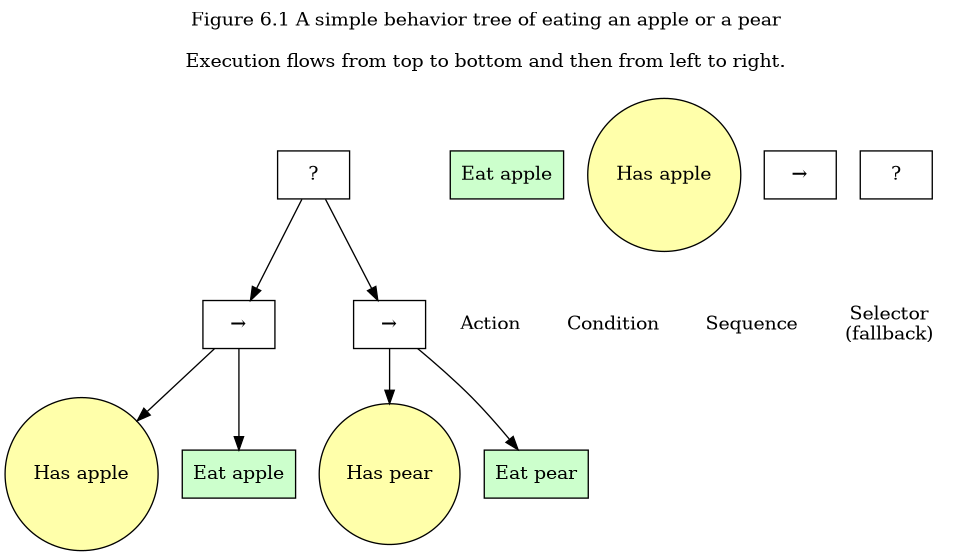

In [2]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph
bt = Digraph('BehaviorTree', comment='A simple behavior tree of eating an apple or a pear')

# Set graph attributes
bt.attr(rankdir='TB')  # Top to bottom layout
bt.attr('node', shape='box', style='filled', fillcolor='white')

# Add nodes
# Root node - Selector
root = '1'
bt.node(root, '?', shape='box')
bt.attr(label='Figure 6.1 A simple behavior tree of eating an apple or a pear')

# Left branch - Sequence
left_seq = '2'
bt.node(left_seq, '→', shape='box')

# Right branch - Sequence
right_seq = '5'
bt.node(right_seq, '→', shape='box')

# Conditions - circular yellow nodes
bt.node('3', 'Has apple', shape='circle', fillcolor='#FFFFAA')
bt.node('6', 'Has pear', shape='circle', fillcolor='#FFFFAA')

# Actions - rectangular green nodes
bt.node('4', 'Eat apple', shape='box', fillcolor='#CCFFCC')
bt.node('7', 'Eat pear', shape='box', fillcolor='#CCFFCC')

# Add edges connecting the nodes
bt.edge(root, left_seq)
bt.edge(root, right_seq)
bt.edge(left_seq, '3')
bt.edge(left_seq, '4')
bt.edge(right_seq, '6')
bt.edge(right_seq, '7')

# Add a legend
with bt.subgraph(name='cluster_legend') as legend:
    legend.attr(rank='same', label='', style='invis')
    
    legend.node('legend_selector', '?', shape='box')
    legend.node('legend_selector_label', 'Selector\n(fallback)', shape='plaintext')
    
    legend.node('legend_sequence', '→', shape='box')
    legend.node('legend_sequence_label', 'Sequence', shape='plaintext')
    
    legend.node('legend_condition', 'Has apple', shape='circle', fillcolor='#FFFFAA')
    legend.node('legend_condition_label', 'Condition', shape='plaintext')
    
    legend.node('legend_action', 'Eat apple', shape='box', fillcolor='#CCFFCC')
    legend.node('legend_action_label', 'Action', shape='plaintext')
    
    # Connect legend items to their labels invisibly
    legend.edge('legend_selector', 'legend_selector_label', style='invis')
    legend.edge('legend_sequence', 'legend_sequence_label', style='invis')
    legend.edge('legend_condition', 'legend_condition_label', style='invis')
    legend.edge('legend_action', 'legend_action_label', style='invis')

# Add a note about execution flow
bt.attr(label='Figure 6.1 A simple behavior tree of eating an apple or a pear\n\n' + 
             'Execution flows from top to bottom and then from left to right.')

# Add a title annotation
bt.attr(labelloc='t')

# Save the diagram as a PNG file
bt.render('behavior_tree', format='png', cleanup=True)

# Display the diagram
Image(filename='behavior_tree.png')



Primary nodes used in behaviour trees

|Node|Purpose|Function|Type|
|---|---|---|---|
|Selector(fallback)|This node works by selecting the first child that completes successfully. It's often called the fallback node because it will always fall back to the last successful node that executed.|The node calls its children in sequence and stops executing when the first child succeeds. When a child node succeeds, it will return success; if no nodes succeed, it returns failure.|Composite|
|Sequence|This node executes all of its children in sequence until one node fails or they all complete successfully.|The node calls each of its children in sequence when they succeed, but if one of its children fails it will stop and return fail. If all children succeed, it returns success, and failure if just one child fails.|Composite|
|Condition|Behaviour trees don't use Boolean logic but rather success or failure as a means of control. The condition returns success if the condition is true and false otherwise.| The node returns success or failure based on a condition.|Task|
|Action|This is where the action happens.|The node executes and returns success if successful or returns failure otherwise.|Task|
|Decorator|They work by controlling the execution of child nodes. They are oftern referred to as conditionals because they can determine whether a node is worth executor or safe to execute.|The node controls execution of the child nodes. Decorators can operate as control barrier functions to block or prevent unwanted behaviours.|Decorator|
|Parallel|This node executes all of its nodes in parallel. Success or failure is controlled by a threshold of the number of children needed to succeed to return success.|The node executes all of its child nodes in sequence regardless of the status of the nodes.|Composite|

Behaviour tree execution<br>
Understanding how behaviour trees execute is crucial to designing and implementing behaviour trees. Unlike most concepts in computer science, behaviour trees operate in terms of success and failure. When a node in a behaviour tree executes, it will return either success or failure; this even applies to conditions and selector nodes.

Behaviour tre
es execute from top to bottom and left to right.


first_btree.py

In [5]:
! uv pip install py_trees

Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Resolved 4 packages in 206ms                                         
Installed 3 packages in 7ms                                 
 + py==1.11.0
 + py-trees==2.3.0
 + pydot==3.0.4


In [7]:
import py_trees

class HasApple(py_trees.behaviour.Behaviour):
    def __init__(self, name):
        super(HasApple, self).__init__(name)

    def update(self):
        # Condition check (placeholder for actual logic)
        if True: # Replace with actual condition
            return py_trees.common.Status.SUCCESS
        else:
            return py_trees.common.Status.FAILURE
        
class EatApple(py_trees.behaviour.Behaviour):
    def __init__(self, name):
        super(EatApple, self).__init__(name)

    def update(self):
        # Action execution (placeholder for actual logic)
        print("Eating apple...")
        return py_trees.common.Status.SUCCESS
    
class HasPear(py_trees.behaviour.Behaviour):
    def __init__(self, name):
        super(HasPear, self).__init__(name)

    def update(self):
        # Condition check (placeholder for actual logic)
        if True: # Replace with actual condition
            return py_trees.common.Status.SUCCESS
        else:
            return py_trees.common.Status.FAILURE
        
class EatPear(py_trees.behaviour.Behaviour):
    def __init__(self, name):
        super(EatPear, self).__init__(name)

    def update(self):
        # Action execution (placeholder for actual logic)
        print("Eating pear...")
        return py_trees.common.Status.SUCCESS

# Create the behaviour tree nodes
has_apple = HasApple(name="Has apple")
eat_apple = EatApple(name="Eat apple")
sequence_1 = py_trees.composites.Sequence(name="Sequence 1", memory=True)
sequence_1.add_children([has_apple, eat_apple])

has_pear = HasPear(name="Has pear")
eat_pear = EatPear(name="Eat pear")
sequence_2 = py_trees.composites.Sequence(name="Sequence 2", memory=True)
sequence_2.add_children([has_pear, eat_pear])

root = py_trees.composites.Selector(name="Selector", memory=True)
root.add_children([sequence_1, sequence_2])

# Create the behaviour tree
behavior_tree  = py_trees.trees.BehaviourTree(root)

# Execute the behavior tree
py_trees.logging.level = py_trees.logging.Level.DEBUG
for i in range(1, 4):
    print("\n-------------------- Tick {0} --------------------".format(i))
    behavior_tree.tick()


-------------------- Tick 1 --------------------
[DEBUG] Selector             : Selector.tick()
[DEBUG] Selector             : Selector.tick() [!RUNNING->reset current_child]
[DEBUG] Sequence 1           : Sequence.tick()
[DEBUG] Has apple            : HasApple.tick()
[DEBUG] Has apple            : HasApple.stop(Status.INVALID->Status.SUCCESS)
[DEBUG] Eat apple            : EatApple.tick()
Eating apple...
[DEBUG] Eat apple            : EatApple.stop(Status.INVALID->Status.SUCCESS)
[DEBUG] Sequence 1           : Sequence.stop()[Status.INVALID->Status.SUCCESS]

-------------------- Tick 2 --------------------
[DEBUG] Selector             : Selector.tick()
[DEBUG] Selector             : Selector.tick() [!RUNNING->reset current_child]
[DEBUG] Sequence 1           : Sequence.tick()
[DEBUG] Has apple            : HasApple.stop(Status.SUCCESS->Status.INVALID)
[DEBUG] Eat apple            : EatApple.stop(Status.SUCCESS->Status.INVALID)
[DEBUG] Has apple            : HasApple.tick()
[DEBUG] Ha

# RAG
document_vector_similarity.py

In [ ]:
from typing import List, Dict, Optional, Union, Any
import plotly.graph_objects as go
from plotly.graph_objects import Figure
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import spmatrix
import numpy as np
from numpy import ndarray

# Sample Documents
documents: List[str] = [
    "The sky is blue and beautiful.",
    "Love this blue and beautiful sky!",
    "The quick brown fox jumps over the lazy dog.",
    "A king's breakfast has sausages, ham, bacon, eggs, toast, and beans",
    "I love green eggs, ham, sausages and bacon!",
    "The brown fox is quick and the blue dog is lazy!",
    "The sky is very blue and the sky is very beautiful today",
    "The dog is lazy but the brown fox is quick!"
]

# Vectorize using TF-IDF
vectorizer: TfidfVectorizer = TfidfVectorizer()
X: spmatrix = vectorizer.fit_transform(documents)

# Calculate Cosine Similarity
cosine_similarities: ndarray = cosine_similarity(X)

while True:
    # User input for selecting a document
    selected_document_index: str = input(f"Enter a document number (0-{len(documents)-1}) or 'exit' to quit: ").strip()

    if selected_document_index.lower() == 'exit':
        break

    if not selected_document_index.isdigit() or not 0 <= int(selected_document_index) < len(documents):
        print("Invalid input. Please enter a valid document number.")
        continue

    selected_document_index: int = int(selected_document_index)

    # Extract similarity scores for the selected document
    selected_document_similarities: ndarray = cosine_similarities[selected_document_index]
    print("selected_document_similarities: ", selected_document_similarities)

    # Truncate long document texts for x-axis labels
    x_axis_labels: List[str] = [doc[:50] + "..." if len(doc) > 50 else doc for doc in documents]

    # Plotting the consine similarity
    fig: Figure = go.Figure([go.Bar(x=x_axis_labels,
                                    y=selected_document_similarities)])

    fig.update_layout(title=f"Cosile Similarities of '{documents[selected_document_index][:50] + '...' if len(documents[selected_document_index]) > 50 else documents[selected_document_index]}' with Others")

    fig.show()

document_visualizing_embeddings.py

In [ ]:
from typing import List, Dict, Optional, Union, Any
from openai import OpenAI
import numpy as np
from numpy import ndarray
from scipy.sparse import spmatrix
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.graph_objects import Figure

client: OpenAI = OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama"
)

def get_embedding(text: str, model: str="nomic-embed-text") -> List[float]:
    text: str = text.replace("\n", " ")
    return client.embeddings.create(
        input = [text],
        model= model
    ).data[0].embedding

# Sample documents
documents: str = [
    "The sky is blue and beautiful.",
    "Love this blue and beautiful sky!",
    "The quick brown fox jumps over the lazy dog.",
    "A king's breakfast has sausages, ham, bacon, eggs, toast, and beans",
    "I love green eggs, ham, sausages and bacon!",
    "The brown fox is quick and the blue dog is lazy!",
    "The sky is very blue and the sky is very beautiful today",
    "The dog is lazy but the brown fox is quick!"
]

# Generate embeddings for each document
embeddings: List[List[float]] = [get_embedding(doc) for doc in documents]
# print(f"embeddings: {embeddings}")

# Convrt embeddings to a numpy array for PCA
embeddings_array: ndarray = np.array(embeddings)


# Applying PCA to reduce dimentsions to 3
pca: PCA = PCA(n_components=3)
reduce_embeddings: ndarray = pca.fit_transform(embeddings_array)

# Creating a 3D plot using Plotly
fig: Figure = go.Figure(data=[go.Scatter3d(
    x=reduce_embeddings[:, 0],
    y=reduce_embeddings[:, 1],
    z=reduce_embeddings[:, 2],
    mode='markers+text',
    text=documents, # Adding socument texts for hover
    hoverinfo='text', # Shoing only the text on hover
    marker=dict(
        size=1,
        color=list(range(len(documents))), # Assigning a unique color to each document
        opacity=0.8
    )
)])

# Adding titles and labels to the plot
fig.update_layout(title='3D PCA of Document Embeddings',
                  scene=dict(
                      xaxis_title='PCA Component 1',
                      yaxis_title='PCA Component 2',
                      zaxis_title='PCA Component 3'
                  ))

fig.show()

document_vector_database.py

In [ ]:
from typing import List, Dict, Optional, Union, Tuple, Any
import numpy as np
from numpy import ndarray
from scipy.sparse import spmatrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Sample Documents
documents: List[str] = [
    "The sky is blue and beautiful.",
    "Love this blue and beautiful sky!",
    "The quick brown fox jumps over the lazy dog.",
    "A king's breakfast has sausages, ham, bacon, eggs, toast, and beans",
    "I love green eggs, ham, sausages and bacon!",
    "The brown fox is quick and the blue dog is lazy!",
    "The sky is very blue and the sky is very beautiful today",
    "The dog is lazy but the brown fox is quick!"
]

# Step 1: Vectorize with TF-IDF Vectorizer
vectorizer: TfidfVectorizer = TfidfVectorizer()
X: spmatrix = vectorizer.fit_transform(documents)

# Step 2: Store vectores in a simple vector database (here, a list)
vector_database: ndarray = X.toarray()

# Step 3: Cosine similarity Search Function
def cosine_similarity_search(
        query: str, 
        database: ndarray, 
        vectorizer: TfidfVectorizer,
        top_n: int = 5) -> List[Tuple[int, float]]:
    query_vec: ndarray = vectorizer.transform([query]).toarray()
    similarities: ndarray = cosine_similarity(query_vec, database)[0]
    top_indices: List[int] = np.argsort(-similarities)[:top_n] # Top n indices
    return [(idx, similarities[idx]) for idx in top_indices]

# Input Loop for Search Queries
while True:
    query: str = input("Enter a search query (or 'exit' to stop): ")
    if query.lower() == 'exit':
        break
    top_n: int = int(input("How many top matches do you want to see? "))
    search_results: List[Tuple[int, float]] = cosine_similarity_search(
        query,
        vector_database,
        vectorizer,
        top_n=top_n
    )

    print("Top Matched Documents:")
    for idx, score in search_results:
        print(f"- {documents[idx]} (Score: {score:.4f})")

    print("\n")

### ChromaDB
document_query_chroma.py

In [1]:
! uv pip install chromadb

Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Audited 1 package in 6ms


In [1]:
from typing import List, Dict, Optional, Union, Tuple, Any
from openai import OpenAI
from chromadb import chromadb, Client, Collection
from chromadb.api.types import QueryResult, IDs, Documents

client: OpenAI = OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama"
)

def get_embedding(text: str, model: str="nomic-embed-text") -> List[float]:
    text: str = text.replace("\n", " ")
    return client.embeddings.create(
        input = [text],
        model= model
    ).data[0].embedding

# Sample documents
documents: List[str] = [
    "The sky is blue and beautiful.",
    "Love this blue and beautiful sky!",
    "The quick brown fox jumps over the lazy dog.",
    "A king's breakfast has sausages, ham, bacon, eggs, toast, and beans",
    "I love green eggs, ham, sausages and bacon!",
    "The brown fox is quick and the blue dog is lazy!",
    "The sky is very blue and the sky is very beautiful today",
    "The dog is lazy but the brown fox is quick!"
]

# Generate embeddings for each document
embeddings: List[List[float]] = [get_embedding(doc) for doc in documents]
ids = [f"doc_{i}" for i in range(len(documents))]

# Create Chroma dagabase client
chroma_client: Client = chromadb.Client()

# Create a collection
collection: Collection = chroma_client.create_collection(name="documents")

collection.add(
    embeddings=embeddings,
    documents=documents,
    ids=ids
)

def query_chromadb(query: str, top_n: int = 2) -> List[Tuple[IDs, List[float], Documents]]:
    """
    Returns the text of the top 2 results from the 
    ChromaDB collection
    """
    query_embedding: List[float] = get_embedding(query)
    results: QueryResult = collection.query(
        query_embeddings=[query_embedding],
        n_results=top_n
    )
    return [(id, score, text) for id, score, text in
            zip(results['ids'][0],
                results['distances'][0],
                results['documents'][0])]

# Input Loop for Search Queries
while True:
    query: str = input("Enter a search query (or 'exit' to stop): ")
    if query.lower() == 'exit':
        break
    top_n: int = int(input("How many top matches do you want to see? "))
    search_results: List[Tuple[IDs, List[float], Documents]] = query_chromadb(
        query,
        top_n=top_n
    )

    print("Top Matched Documents:")
    for id, score, text in search_results:
        print(f"- {text} (Score: {score:.4f})")

    print("\n")

Top Matched Documents:
- A king's breakfast has sausages, ham, bacon, eggs, toast, and beans (Score: 0.8975)
- I love green eggs, ham, sausages and bacon! (Score: 1.0637)
- The quick brown fox jumps over the lazy dog. (Score: 1.1367)




In [4]:
collection.get("doc_0")

{'ids': ['doc_0'],
 'embeddings': None,
 'documents': ['The sky is blue and beautiful.'],
 'uris': None,
 'data': None,
 'metadatas': [None],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

## LangChain
langchain_load_splitting.py

In [4]:
! uv pip install unstructured

Using Python 3.12.3 environment at: /home/yi/Documents/tutorials/tutorials/.venv
Resolved 55 packages in 468ms                                        
⠙ Preparing packages... (0/14)                                                  
⠙ Preparing packages... (0/14)-----     0 B/30.72 KiB                   
python-magic ------------------------------     0 B/13.52 KiB
⠙ Preparing packages... (0/14)-----     0 B/30.72 KiB                   
python-magic ------------------------------ 13.52 KiB/13.52 KiB
⠙ Preparing packages... (0/14)-----     0 B/30.72 KiB                   
python-magic ------------------------------ 13.52 KiB/13.52 KiB
filetype   ------------------------------     0 B/19.50 KiB
⠙ Preparing packages... (0/14)-----     0 B/30.72 KiB                   
python-magic ------------------------------ 13.52 KiB/13.52 KiB
filetype   ------------------------------ 14.84 KiB/19.50 KiB
⠙ Preparing packages... (0/14)-----     0 B/30.72 KiB                   
filetype   ----------------

In [ ]:
from typing import List, Dict, Optional, Union, Tuple, Any
from openai import OpenAI
from chromadb import chromadb, Client, Collection, IDs, Documents

from langchain_community.document_loaders import UnstructuredHTMLLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.documents import Document

client: OpenAI = OpenAI(
    base_url="http://localhost:11434/v1",
    api_key="ollama"
)

def get_embedding(text: str, model: str="nomic-embed-text") -> List[float]:
    text: str = text.replace("\n", " ")
    return client.embeddings.create(
        input = [text],
        model= model
    ).data[0].embedding

loader: UnstructuredHTMLLoader = UnstructuredHTMLLoader("rag/sample_documents/mother_goose.html")
data: List[Document] = loader.load()

text_splitter: RecursiveCharacterTextSplitter = RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=2,
    length_function=len,
    add_start_index=True
)

documents: List[Document] = text_splitter.split_documents(data)

# Extract page content from the documents
documents: List[str] = [doc.page_content for doc in documents][100:350] # only use 50 documents/chunks (cheaper and faster)

# Generate embeddings for each document
embeddings: List[List[float]] = [get_embedding(doc) for doc in documents]
ids = [f"id{i}" for i in range(len(documents))]


# Create Chroma database client
chroma_client: Client = chromadb.Client()

# Create a collection
collection: Collection = chroma_client.create_collection(name="documents")

collection.add(
    embeddings=embeddings,
    documents=documents,
    ids=ids
)

def query_chromadb(query: str, top_n: int = 2) -> List[Tuple[IDs, List[float], Documents]]:
    """
    Returns the text of the top 2 results from the ChromaDB collection
    """
    query_embedding: List[float] = get_embedding(query)
    results: QueryResult = collection.query(
        query_embeddings=[query_embedding],
        n_results=top_n
    )
    return [(id, score, text) for id, score, text in
            zip(results['ids'][0],
                results['distances'][0],
                results['documents'][0])]

# Input Loop for Search Queries
while True:
    query: str = input("Enter a search query (or 'exit' to stop): ")
    if query.lower() == 'exit':
        break
    top_n: int = int(input("How many top matches do you want to see? "))
    search_results: List[Tuple[IDs, List[float], Documents]] = query_chromadb(
        query,
        top_n=top_n
    )

    print("Top Matched Documents:")
    for id, score, text in search_results:
        print(f"ID:{id} Text: {text} (Score: {score:.4f})")

    print("\n")

Top Matched Documents:
ID:id232 Text: Doctor Foster went to Glo'ster, In a shower of rain; He stepped in a puddle, up to his middle, And (Score: 0.8849)
ID:id231 Text: gun, but he fired too soon, And the drake flew away with a quack, quack, quack. DOCTOR FOSTER (Score: 1.0132)
ID:id214 Text: tack, too. (Score: 1.0208)
ID:id244 Text: swine; But sit on a cushion, and sew a fine seam And feed upon strawberries, sugar, and cream. (Score: 1.0391)




langchain_token_splitting.py

In [1]:
from typing import List, Dict, Optional, Union, Tuple, Any
from langchain_community.document_loaders import UnstructuredHTMLLoader
from langchain_ollama import OllamaEmbeddings
from langchain.vectorstores import Chroma
from langchain.text_splitter import CharacterTextSplitter
from langchain_core.documents import Document

embeddings_client: OllamaEmbeddings = OllamaEmbeddings(
    base_url="http://localhost:11434",
    model="nomic-embed-text"
)

loader: UnstructuredHTMLLoader = UnstructuredHTMLLoader("rag/sample_documents/mother_goose.html")
data: List[Document] = loader.load()

text_splitter: CharacterTextSplitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=50,
    chunk_overlap=10
)

documents: List[Document] = text_splitter.split_documents(data)

# Extract page content from the documents
documents = [doc for doc in documents][8:94] # Capture just the rhymes

db: Chroma = Chroma.from_documents(documents, embeddings_client)

def query_documents(query: str, top_n: int = 2) -> List[Document]:
    return db.similarity_search(query, top_n)

# Input Loop for Search Queries
while True:
    query: str = input("Enter a search query (or 'exit' to stop): ")
    if query.lower() == 'exit':
        break
    top_n: int = int(input("How many top matches do you want to see? "))
    search_results: List[Document] = query_documents(
        query,
        top_n=top_n
    )

    print("Top Matched Documents:")
    for i, doc in enumerate(search_results):
        print(f"Document{i+1}: {doc.page_content}")

    print("\n")

Created a chunk of size 94, which is longer than the specified 50
Created a chunk of size 1263, which is longer than the specified 50
Created a chunk of size 2603, which is longer than the specified 50
Created a chunk of size 266, which is longer than the specified 50
Created a chunk of size 164, which is longer than the specified 50
Created a chunk of size 296, which is longer than the specified 50
Created a chunk of size 330, which is longer than the specified 50
Created a chunk of size 184, which is longer than the specified 50
Created a chunk of size 160, which is longer than the specified 50
Created a chunk of size 322, which is longer than the specified 50
Created a chunk of size 67, which is longer than the specified 50
Created a chunk of size 323, which is longer than the specified 50
Created a chunk of size 345, which is longer than the specified 50
Created a chunk of size 131, which is longer than the specified 50
Created a chunk of size 171, which is longer than the specifie

Top Matched Documents:
Document1: THE CAT AND THE FIDDLE Hey, diddle, diddle! The cat and the fiddle, The cow jumped over the moon; The little dog laughed To see such sport, And the dish ran away with the spoon. DOCTOR FELL I do not like thee, Doctor Fell; The reason why I cannot tell; But this I know, and know full well, I do not like thee, Doctor Fell! A COUNTING-OUT RHYME Hickery, dickery, 6 and 7, Alabone, Crackabone, 10 and 11, Spin, spun, muskidun, Twiddle 'em, twaddle 'em, 21.
Document2: A LITTLE MAN There was a little man, and he had a little gun, And his bullets were made of lead, lead, lead; He went to the brook, and saw a little duck, And shot it right through the head, head, head. He carried it home to his old wife Joan, And bade her a fire to make, make, make. To roast the little duck he had shot in the brook, And he'd go and fetch the drake, drake, drake. The drake was a-swimming with his curly tail; The little man made it his mark, mark, mark. He let off his gun, but he 

## Memory
Forms of memory that maps to agent functions:
- Sensory memory in AI: Functions such as RAG but the images/audio/haptic data forms. Briefly holds input data (e.g., text and images) for immediate processing but not long-term storage.
- Short-term/working memory in AI: Acts as an active memory buffer of conversation history. we're holding limited amount of recent input and context for immediate analysis and response generation. Within Nexus, short- and long-term conversational memory is also held in the context of the thread.
- Long-term memory in AI: Longer-term memory storange relevant to the agent's or user's life. Semantic memory provides a robust capacity to store and retrieve relevant global and local facts and concepts.